<a href="https://colab.research.google.com/github/iitianpushkar/DAI-Assignment/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys

<ipython-input-16-1533edb1f887>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")
<ipython-input-16-1533edb1f887>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))
<ipython-input-16-1533edb1f887>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa


Summary Statistics:
              Rank   Enrollment
count  5783.000000  5783.000000
mean   2892.000000   386.317828
std    1669.552635   444.331645
min       1.000000     0.000000
25%    1446.500000    60.000000
50%    2892.000000   170.000000
75%    4337.500000   550.000000
max    5783.000000  1285.000000

Mode:
Rank                                                                     1.0
NCT Number                                                       nct00571389
Title                            a study of ad26.cov2.s in adults (covid-19)
Status                                                            recruiting
Study Results                                           no results available
Conditions                                                          covid-19
Interventions                                                        unknown
Outcome Measures                                                     unknown
Sponsor/Collaborators                assistance publique - hôpitaux 

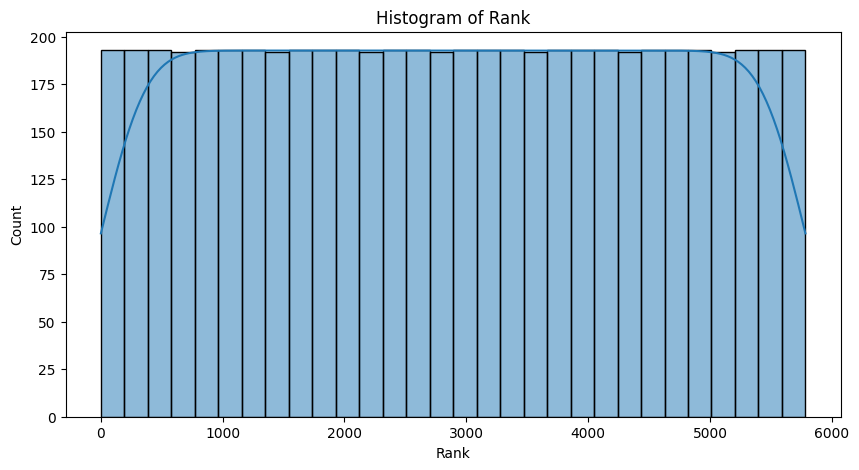

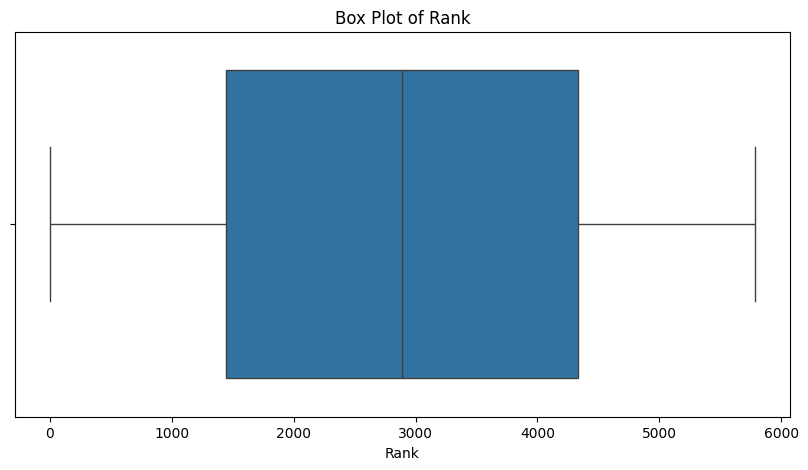

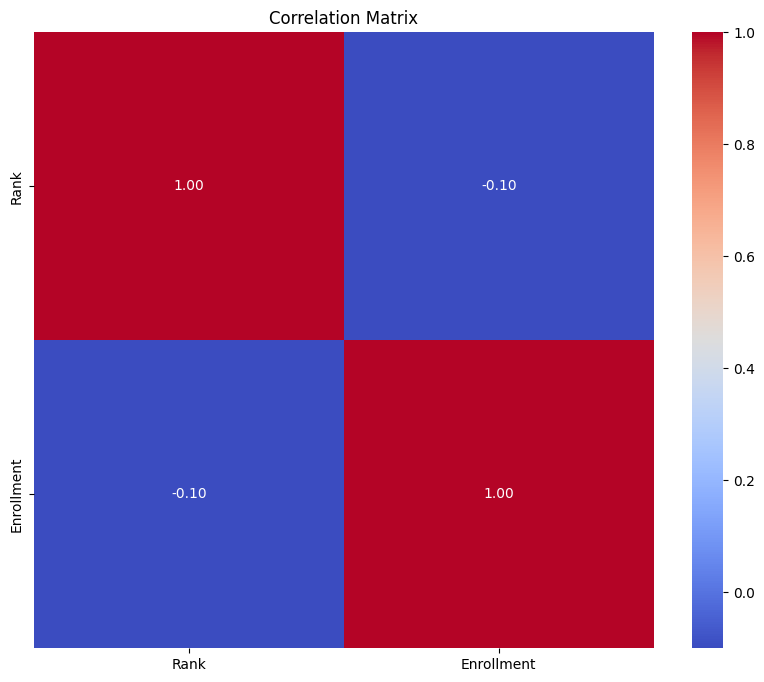

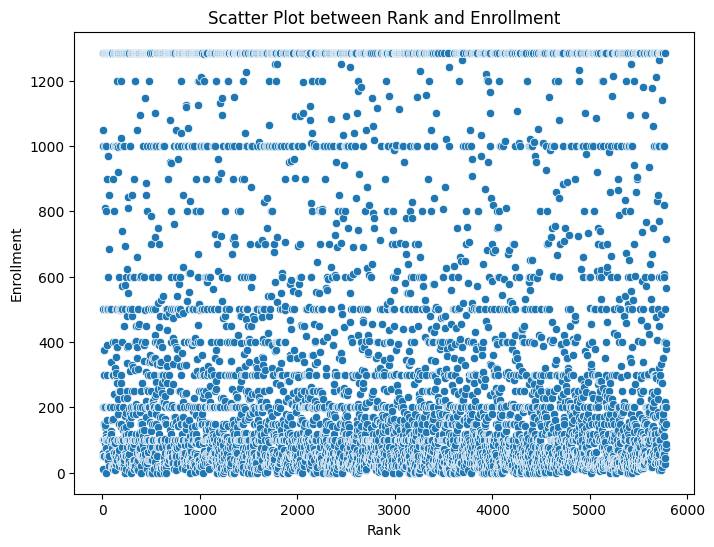

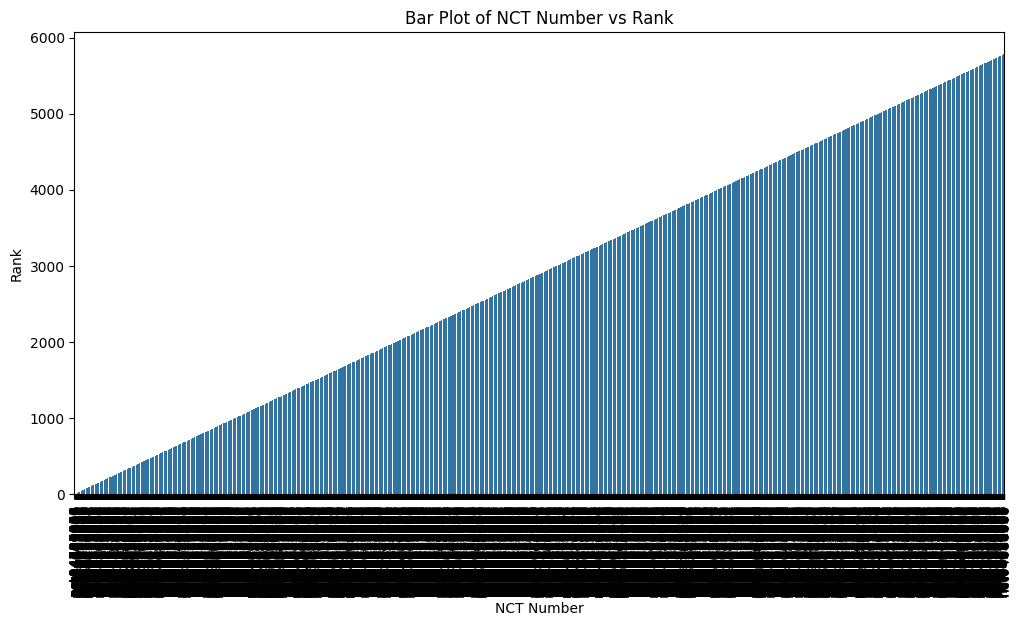

KeyboardInterrupt: 

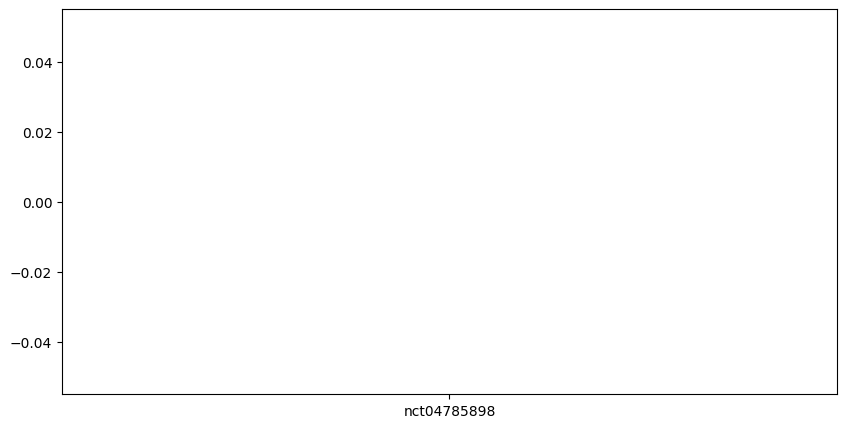

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/COVID clinical trials.csv")

# Display basic information
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

# Handling Missing Values
# Drop columns with excessive missing values (> 50%)
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill missing categorical values with "Unknown"
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")

# Fill missing numerical values with median
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Remove Duplicates
df_cleaned.drop_duplicates(inplace=True)

# Outlier Detection and Treatment using IQR
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

# Standardizing categorical values
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip().str.lower())


print("Missing values after cleaning\n",df_cleaned.isnull().sum())

# Saving cleaned dataset
df_cleaned.to_csv("cleaned_COVID_clinical_trials.csv", index=False)

# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df_cleaned.describe())
print("\nMode:")
print(df_cleaned.mode().iloc[0])
print("\nSkewness:")
print(df_cleaned[numerical_cols].skew())

# Frequency distribution for categorical variables
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(df_cleaned[col].value_counts())

# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned[numerical_cols[0]], bins=30, kde=True)
plt.title("Histogram of " + numerical_cols[0])
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned[numerical_cols[0]])
plt.title("Box Plot of " + numerical_cols[0])
plt.show()

# Bivariate Analysis
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Scatter Plot for first two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned[numerical_cols[0]], y=df_cleaned[numerical_cols[1]])
plt.title(f"Scatter Plot between {numerical_cols[0]} and {numerical_cols[1]}")
plt.show()

# Bar Plot for a categorical and numerical variable
plt.figure(figsize=(12, 6))
sns.barplot(x=df_cleaned[categorical_cols[0]], y=df_cleaned[numerical_cols[0]])
plt.xticks(rotation=90)
plt.title(f"Bar Plot of {categorical_cols[0]} vs {numerical_cols[0]}")
plt.show()

# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=df_cleaned[categorical_cols[0]], y=df_cleaned[numerical_cols[0]])
plt.xticks(rotation=90)
plt.title(f"Violin Plot of {categorical_cols[0]} vs {numerical_cols[0]}")
plt.show()

# Multivariate Analysis
# Pair Plot
sns.pairplot(df_cleaned[numerical_cols])
plt.show()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Grouped Comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned[categorical_cols[0]], y=df_cleaned[numerical_cols[0]], hue=df_cleaned[categorical_cols[1]])
plt.xticks(rotation=90)
plt.title(f"Box Plot of {categorical_cols[0]} vs {numerical_cols[0]} grouped by {categorical_cols[1]}")
plt.show()


